In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
# Read in csv
def ReadCSV(filename):
    data = pd.read_csv(filename)
    
    # Selecting all rows
    rows = np.array(data.loc[:])
    
    # Defining all relevant columns
    date = rows[:,0]
    magX = rows[:,3]
    magY = rows[:,4]
    magZ = rows[:,5]
    
    # Change time to seconds
    #time = []
    #for i in range(len(date)):
    #    splittime = datetime.fromisoformat(date[i])     # Split time
    #    time.append(splittime)
    #time = np.array(time)    
    
    return date,magX,magY,magZ#,time

In [3]:
# Calculate total magnetic field
def TotalMag(x,y,z):
    x = x.astype(float)
    y = y.astype(float)
    z = z.astype(float)
    total = np.sqrt(x**2 + y**2 + z**2)
    return total

In [4]:
date010222,magX010222,magY010222,magZ010222 = ReadCSV('data/crowdmag_1-2-22_iPhone12,1_2022-01-01 190715.csv')
print(date010222)
print(magX010222)
print(magY010222)
print(magZ010222)

['2022-12-31 04:14:37' '2022-12-31 04:15:49' '2022-12-31 04:16:59' ...
 '2022-01-01 19:03:21' '2022-01-01 19:04:31' '2022-01-01 19:05:40']
[-581.65 2942.63 -4409.79 ... -8514.43 -8481.17 -8478.07]
[-15736.5 -11516.17 -13107.16 ... 939.9 896.52 895.43]
[-46813.92 -44823.11 -40893.67 ... -66669.23 -66836.71 -66869.6]


In [5]:
totalmag010222 = TotalMag(magX010222,magY010222,magZ010222)

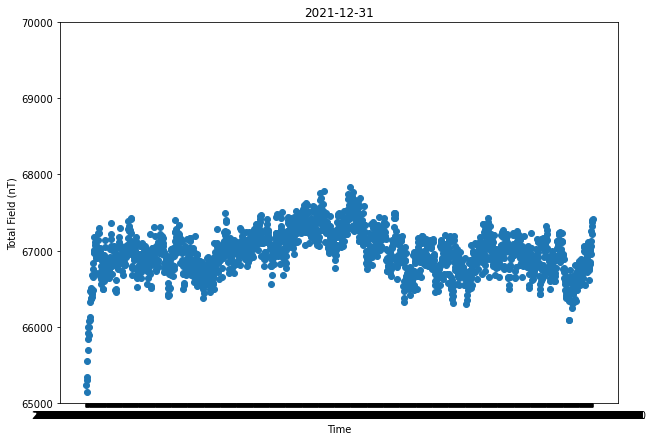

In [6]:
# Plot
plt.figure(figsize=(10,7))
plt.scatter(date010222,totalmag010222)
plt.title("2021-12-31")
plt.xlabel("Time")
plt.ylabel("Total Field (nT)")
plt.ylim(65000,70000)
plt.show()